C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14096\3091010700.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="Year", y="Landfills emissions (TMTCO2e)", ci=None, marker='o', linewidth=3)  # ci=None removes confidence intervals
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

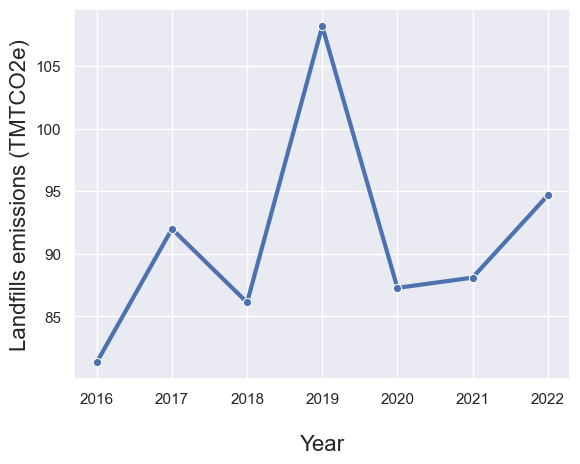

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create or load your data
data = pd.DataFrame({
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Landfills emissions (TMTCO2e)': [81349/1000,91993/1000,86122/1000,108171/1000,87285/1000,88101/1000,94667/1000]
})

# Create the line plot
sns.set(style="darkgrid")  # Optional: Set the style of the plot

sns.lineplot(data=data, x="Year", y="Landfills emissions (TMTCO2e)", ci=None, marker='o', linewidth=3)  # ci=None removes confidence intervals

# Customize the plot (optional)

plt.xlabel("Year",fontsize=16, labelpad=20)
plt.ylabel("Landfills emissions (TMTCO2e)",fontsize=16)
#plt.ylim(0, 30)  # Set the y-axis limits

# Display the plot
#plt.show()
plt.savefig('../../../figures/Report-images/Relandfills-emissions-years.png', dpi=600,bbox_inches='tight')

In [3]:
#2021 landfill emissions data come from FLIGHT, which include landfills and resource-recoverage facility
data = np.array([['New Haven-Milford', 0],
                 ['Hartford-east Hartford-Middletown',377019/1000000],
                 ['Bridgeport-Stamford-Norwalk', 290551/1000000]])

df = pd.DataFrame(data, columns=['MSA', 'GHG Emissions (MMTCO2e)'])
df["Stationary combustion (MMTCO2e)"]= [0,289425/1000000,290551/1000000]
df["Landfill methane (MMTCO2e)"]= [0,87594/1000000,0]

In [4]:
df

,MSA,GHG Emissions (MMTCO2e),Stationary combustion (MMTCO2e),Landfill methane (MMTCO2e)
0,New Haven-Milford,0,0.000000,0.000000
1,Hartford-east Hartford-Middletown,0.377019,0.289425,0.087594
2,Bridgeport-Stamford-Norwalk,0.290551,0.290551,0.000000


In [5]:
population_five_towns = pd.read_csv('../../../results/population_five_towns.csv')
population_five_towns = population_five_towns[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_five_towns_21 = population_five_towns.iloc[0,1:4]

population = pd.read_csv('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/tidy/population.csv')
population = population[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_21 = population.iloc[0,1:4]
numeric_pop_21 = pd.to_numeric(population_21.str.replace(',', ''), errors='coerce')


In [6]:
numeric_pop_21

New Haven-Milford, CT Metro Area                     864751
Hartford-East Hartford-Middletown, CT Metro Area    1213324
Bridgeport-Stamford-Norwalk, CT Metro Area           956446
Name: 0, dtype: int64

In [7]:
population_five_towns_21

New Haven-Milford, CT Metro Area                     864751
Hartford-East Hartford-Middletown, CT Metro Area    1238888
Bridgeport-Stamford-Norwalk, CT Metro Area           986344
Name: 0, dtype: int64

In [8]:
#assuming that the solidwaste is positive correlated with the population in that particular year
ratio = population_five_towns_21[1]/numeric_pop_21[1]

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14096\1606988693.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio = population_five_towns_21[1]/numeric_pop_21[1]


In [9]:
# Define the row index and columns you want to modify
row_index = [1,2]  # Index of the row you want to modify (zero-based)
columns_to_multiply = ['GHG Emissions (MMTCO2e)', 'Stationary combustion (MMTCO2e)', 'Landfill methane (MMTCO2e)']

# Define the number to multiply the values
multiplier = ratio

df[columns_to_multiply] = df[columns_to_multiply].apply(pd.to_numeric, errors='coerce')

# Multiply the values in the specified row and columns
df.loc[row_index, columns_to_multiply] *= multiplier

In [10]:
df_five = df
df_five

,MSA,GHG Emissions (MMTCO2e),Stationary combustion (MMTCO2e),Landfill methane (MMTCO2e)
0,New Haven-Milford,0.000000,0.000000,0.00000
1,Hartford-east Hartford-Middletown,0.384963,0.295523,0.08944
2,Bridgeport-Stamford-Norwalk,0.296673,0.296673,0.00000


In [11]:
def result_from_solid_waste_landfill():
    return df_five

In [14]:
df_five.to_csv('C:/Users/peiyaozhao/NARS Dropbox/Projects/CT-GHG-Inventories/Results/2021-Solid-waste-landfill-emissions.csv')

In [15]:
df_five.to_csv('../../../results/solidwaste-emissions-automated-sheet.csv')